# Maping San Francisco Crime Incidents for the year 2016

San Francisco Police Department Incidents for the year 2016 -  from San Francisco public data portal.
Incidents derived from San Francisco Police Department (SFPD) Crime Incident Reporting system. Updated daily, showing data for the entire year of 2016. Address and location has been anonymized by moving to mid-block or to an intersection.

### Website: [Police Department Incidents](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/about_data)
### Data source: [link](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv)
#### IBM Certification Excercise

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://swinerton.com/wp-content/uploads/2021/07/IMG_2717_v1-1030x866.jpg")

Image credits:https://swinerton.com/wp-content/uploads/2021/07/IMG_2717_v1-1030x866.jpg

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import folium

In [3]:
# Importing Data

filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv"
df=pd.read_csv(filepath)

### 1. Exploring Data

In [4]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [5]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'150500 Rows by 13 Columns'

In [6]:
print(f"{df.shape[0]} Crimes in LA")

150500 Crimes in LA


In [7]:
df.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


### 2. Mapping the Data!

METADATA

> 1. **IncidntNum**: Incident Number
> 2. **Category**: Category of crime or incident
> 3. **Descript**: Description of the crime or incident
> 4. **DayOfWeek**: The day of week on which the incident occurred
> 5. **Date**: The Date on which the incident occurred
> 6. **Time**: The time of day on which the incident occurred
> 7. **PdDistrict**: The police department district
> 8. **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9. **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location 
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

In [9]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


For the purpose of the excercise im going to work only with 100 crimes randomly

In [10]:
# First 100 crimes randomly

limit=100/df.shape[0]
df=df.sample(frac=limit)
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
67427,160679060,NON-CRIMINAL,"LICENSE PLATE, RECOVERED",Sunday,08/21/2016 12:00:00 AM,22:00,PARK,NONE,SCOTT ST / FULTON ST,-122.436508,37.777067,"(37.7770672269836, -122.436507619977)",16067906071012
76704,160757503,ASSAULT,BATTERY,Saturday,09/17/2016 12:00:00 AM,22:45,NORTHERN,NONE,900 Block of GEARY ST,-122.418940,37.786049,"(37.7860492230028, -122.418940110957)",16075750304134
85413,160441148,WARRANTS,WARRANT ARREST,Monday,05/30/2016 12:00:00 AM,09:39,TENDERLOIN,"ARREST, BOOKED",200 Block of EDDY ST,-122.411800,37.784089,"(37.7840890366868, -122.411800134753)",16044114863010
91592,160890238,SECONDARY CODES,JUVENILE INVOLVED,Monday,10/31/2016 12:00:00 AM,15:30,TARAVAL,JUVENILE BOOKED,2100 Block of 24TH AV,-122.481305,37.747461,"(37.7474613181905, -122.481305019184)",16089023815500
41781,160316789,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Sunday,04/17/2016 12:00:00 AM,23:47,MISSION,"ARREST, BOOKED",19TH ST / CAPP ST,-122.418120,37.760301,"(37.7603012340397, -122.41812008649)",16031678913075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138599,170113252,NON-CRIMINAL,CASE CLOSURE,Friday,12/16/2016 12:00:00 AM,00:01,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",17011325275030
33558,160257951,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,03/29/2016 12:00:00 AM,00:20,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",16025795165010
50033,160516547,ASSAULT,INFLICT INJURY ON COHABITEE,Saturday,06/25/2016 12:00:00 AM,21:43,TENDERLOIN,"ARREST, BOOKED",300 Block of HYDE ST,-122.415911,37.784000,"(37.7839999167561, -122.415910622743)",16051654715040
115730,160007988,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,01/04/2016 12:00:00 AM,02:30,INGLESIDE,NONE,900 Block of GIRARD ST,-122.401758,37.720736,"(37.7207363160972, -122.401758171192)",16000798807021


let's visualize where these crimes took place in the city of San Francisco.

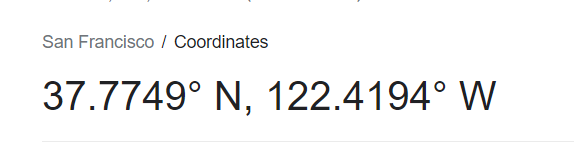

In [11]:
latitude = 37.77
longitude = -122.42

In [12]:
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=13)
sanfran_map

superimpose the locations of the crimes onto the map.

In [13]:
incidents = folium.FeatureGroup()
for lat, lng in zip(df.Y, df.X):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(incidents)
sanfran_map.add_child(incidents)


In [14]:
from folium import plugins
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(sanfran_map)
for lat, lng, label, in zip(df.Y, df.X, df.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map